In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.factory import get_performance_indicator

In [3]:
from testsuite.utilities import Pareto_split

In [4]:
def image_case(case):
    fig = plt.figure(figsize=[6,6])
    ax = fig.gca()
    ax.scatter(*case['a'].T, c="C0", label="a")
    ax.scatter(*case['b'].T, c="C1", label="b")
    ax.set_title(f"a dominates b = {case['dominated']} (strict:{case['strict']})")
    ax.grid('on')
    ax.axis("scaled")
    ax.set_xticks(range(0,7)) 
    ax.set_yticks(range(0,7)) 
    ax.legend(loc="upper left")
    return fig

# TestDifferenceOfHypervolumes
# basic dominated 
case_00 = {'a': np.array([[1., 2.],
                          [2., 1.]
                         ]),
           'b': np.array([[3., 3.]]),
           'dominated': True,
           'maximize': False,
           'strict': True
          }

# basic non-dominated 
case_01 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[3., 3.]]),
           'dominated': False,
           'maximize': False,
           'strict': True
          }
# edge dominated, strict
case_02 = {'a': np.array([[1., 3.],
                          [3., 1.]
                         ]),
           'b': np.array([[3., 3.]]),
           'dominated': False,
           'maximize': False,
           'strict': True
          }
# edge dominated, strict
case_03 = {'a': np.array([[1., 3.],
                          [3., 1.]
                         ]),
           'b': np.array([[3., 3.]]),
           'dominated': True,
           'maximize': False,
           'strict': False 
          }
# edge non-dominated, beyond scope 
case_04 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[0., 5.]]),
           'dominated': False,
           'maximize': False,
           'strict': True
          }

# edge dominated, beyond scope 
case_05 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[2., 5.]]),
           'dominated': True,
           'maximize': False,
           'strict': True
          }

# edge dominated, beyond scope, strict
case_06 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[1., 5.]]),
           'dominated': False,
           'maximize': False,
           'strict': True 
          }

# edge dominated, beyond scope, non-strict
case_07 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[1., 5.]]),
           'dominated': True,
           'maximize': False,
           'strict': False 
          }


# inverted
# basic dominated 
case_10 = {'a': np.array([[1., 2.],
                          [2., 1.]
                         ]),
           'b': np.array([[3., 3.]]),
           'dominated': False,
           'maximize': True,
           'strict': True
          }

# basic non-dominated 
case_11 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[3., 3.]]),
           'dominated': False,
           'maximize': True,
           'strict': True
          }
# edge dominated, strict
case_12 = {'a': np.array([[1., 3.],
                          [3., 1.]
                         ]),
           'b': np.array([[1., 1.]]),
           'dominated': False,
           'maximize': True,
           'strict': True
          }
# edge dominated, strict
case_13 = {'a': np.array([[1., 3.],
                          [3., 1.]
                         ]),
           'b': np.array([[1., 1.]]),
           'dominated': True,
           'maximize': True,
           'strict': False 
          }
# edge non-dominated, beyond scope 
case_14 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[0., 5.]]),
           'dominated': False,
           'maximize': True,
           'strict': True
          }

# edge dominated, beyond scope 
case_15 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[2., 5.]]),
           'dominated': False,
           'maximize': True,
           'strict': True
          }

# edge dominated, beyond scope, strict
case_16 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[0., 4.]]),
           'dominated': False,
           'maximize': True,
           'strict': True 
          }

# edge dominated, beyond scope, non-strict
case_17 = {'a': np.array([[1., 4.],
                          [4., 1.]
                         ]),
           'b': np.array([[0., 4.]]),
           'dominated': True,
           'maximize': True,
           'strict': False 
          }

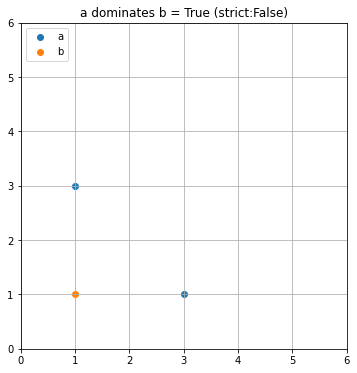

In [5]:
image_case(case_13);

In [6]:
def image_case(case):
    fig = plt.figure(figsize=[6,6])
    ax = fig.gca()
    ax.scatter(*case['p'].T, c="C0", label="p")
    ax.scatter(*case['target'], c="magenta", label="target")
    ax.scatter(*case['ref_point'], c="C2", label="reference")
    ax.set_title(f"doh = {case['doh']}")
    ax.grid('on')
    ax.axis("scaled")
    ax.set_xticks(range(0,7)) 
    ax.set_yticks(range(0,7)) 
    ax.legend(loc="upper left")
    return fig

# TestDifferenceOfHypervolumes
# basic dominated 
case_00 = {'ref_point': np.array([5., 5.]),
          'target' : np.array([4., 4.]),
          'p' : np.array([[1., 3.],
                          [2., 2.],
                          [4., 1.]]),
          'doh': -5.
          }

# basic non-dominated 
case_01 = {'ref_point': np.array([5., 5.]),
          'target' : np.array([1., 1.]),
          'p' : np.array([[1., 3.],
                          [2., 2.],
                          [4., 1.]]),
          'doh': 4.
          }

# edge: dominated, in-line with target
case_02 = {'ref_point': np.array([5., 5.]),
          'target' : np.array([1., 5.]),
          'p' : np.array([[1., 3.],
                          [2., 2.],
                          [4., 1.]]),
          'doh': 0.
          }

# edge: non-dominated, in-line with target
case_03 = {'ref_point': np.array([5., 5.]),
          'target' : np.array([5., 0.]),
          'p' : np.array([[1., 3.],
                          [2., 2.],
                          [4., 1.]]),
          'doh': 0.
          }

# edge: dominated,  beyond scope of p 
case_04 = {'ref_point': np.array([5., 5.]),
          'target' : np.array([0., 4.]),
          'p' : np.array([[1., 3.],
                          [2., 2.],
                          [4., 1.]]),
          'doh': 1.
          }

# edge: non-dominated, beyond scope of p 
case_05 = {'ref_point': np.array([5., 5.]),
          'target' : np.array([2., 4.]),
          'p' : np.array([[1., 3.],
                          [2., 2.],
                          [4., 1.]]),
          'doh': -1.
          }

# edge: beyond reference point 
case_06 = {'ref_point': np.array([5., 5.]),
          'target' : np.array([6., 0.]),
          'p' : np.array([[1., 3.],
                          [2., 2.],
                          [4., 1.]]),
          'doh': AssertionError
          }

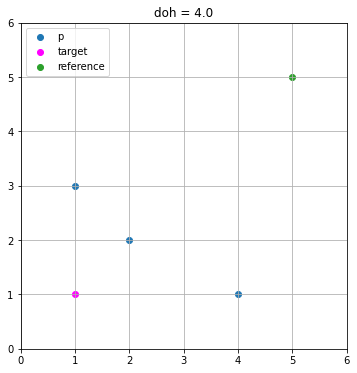

In [7]:
image_case(case_01);

In [57]:
def image_case(case):
    fig = plt.figure(figsize=[6,6])
    ax = fig.gca()
    ax.scatter(*case['p'].T, c="C0", label="p")
    ax.scatter(*case['target'].T, c="magenta", label="target")
    ax.scatter(*case['ref_point'], c="C2", label="reference")
    ax.set_title(f"expected: {case['doh']}    computed: {volume_a(case)}")
    ax.grid('on')
    ax.axis("scaled")
    ax.set_xticks(range(0,12)) 
    ax.set_yticks(range(0,12)) 
    ax.legend(loc="lower left")
    return fig

In [58]:
# def volume_a(case):
#     """
#     hv(t) - hv(t U p)
#     """
#     rp = case['ref_point']
#     t = case['target']
#     p = case['p']
    
#     measure = get_performance_indicator("hv", ref_point = rp)
    
#     a = np.array([p_max[0], p_min[1]]).reshape(1, -1)
#     b = np.array([p_min[0], p_max[1]]).reshape(1, -1)
    
#     ta = t[np.argmin(t[:,0], axis=0)]
#     tb = t[np.argmax(t[:,0], axis=0)]
    
#     fa = np.vstack((ta, a)).max(axis=0).reshape(1,-1)
#     fb = np.vstack((tb, b)).max(axis=0).reshape(1,-1)
    
#     print(fa)
#     print(fb)
#     ff = np.vstack((fa, fb)) 
#     return measure.calc(ff)

In [59]:
case_00 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[2., 8.],
                               [8., 6.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': 20.
          }

case_01 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[0., 8.],
                               [8., 3.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': 26.
          }

case_02 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[0., 7.],
                               [7., 3.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': 36.
          }

case_03 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[1., 8.],
                               [8., 4.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': 26.
          }

case_04 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[3., 8.],
                               [6., 6.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': 22.
          }
case_05 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[2., 8.],
                               [9., 3.]]),
          'p' : np.array([[0., 8.],
                          [1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': 20.
          }

# case_02 = {'ref_point': np.array([10., 10.]),
#           'target' : np.array([[0., 8.],
#                                [9., 5.]]),
#           'p' : np.array([[1., 7.],
#                           [3., 6.],
#                           [5., 5.],
#                           [7., 4.]]),
#           'doh': 21.
#           }

In [89]:
def volume_a(case):
    rp = case['ref_point']
    t = case['target']
    p = case['p']
    
    n_obj = t.shape[1]
    
    
    max_t = t.max(axis=0)
    
    t_new = np.zeros_like(t)
    
    for obj in range(n_obj):
        
    for i, ti in enumerate(t):
        
    measure = get_performance_indicator("hv", ref_point=rp) 
        

In [4]:
case = case_00

NameError: name 'case_00' is not defined

[[2. 8.]
 [8. 6.]]


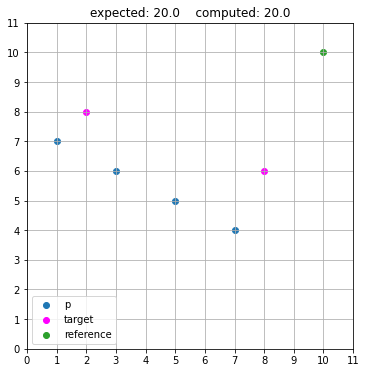

In [91]:
image_case(case);

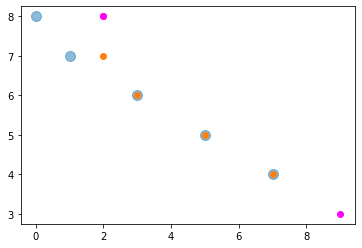

In [481]:
plt.scatter(*p.T, c="C0", s=100, alpha=.5)
plt.scatter(*p_mod.T, c="C1")
plt.scatter(*t.T, c="magenta")

In [541]:
project_targets(case['p'], case['target'])

[1. 7.]
[7. 4.]
